In [1]:
import pandas as pd
from scipy.signal import find_peaks
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon, Ellipse
from matplotlib.path import Path
import matplotlib.patches as patches
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

import os
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
from astropy import units as u

# Error propogation

In [12]:
def multiplication_with_error(x,y,xerr,yerr):
    z = x*y
    zerr = z * ((xerr/x)**2 + (yerr/y)**2)**0.5
    return z, zerr

def division_with_error(x,y,xerr,yerr):
    z = x/y
    zerr = z * ((xerr/x)**2 + (yerr/y)**2)**0.5
    return z, zerr

def addition_with_error(x,y,xerr,yerr):
    z= x+y
    zerr = (xerr**2+yerr**2)**0.5
    return z, zerr

def subtraction_with_error(x,y,xerr,yerr):
    z= x-y
    zerr = (xerr**2+yerr**2)**0.5
    return z, zerr

division_with_error(0.91,0.47,0.1,0.06)
multiplication_with_error(1.936,1.22,0.326,0.02)
subtraction_with_error(1.58, 2.36192, 0.05, 0.3996)
1.58-1.22

0.3600000000000001

# Redshift

# Angular size calculator

In [52]:
def get_angle(distance, size):
    '''
    distance and size in same units
    Returns angle in radians (astropy units)
    '''
    angle = np.arctan(size/distance)
    return angle

def get_distance(angle, size):
    '''
    angle in astropy units
    distance and size in same units
    '''
    distance = size/np.tan(angle)
    return distance

def get_size(angle, distance):
    '''
    angle in astropy units
    distance and size in same units
    '''
#     angle = angle.to(u.rad)
#     size  = distance*np.tan(angle.value)

    size  = distance*np.tan(angle)
    return size



angle , distance, size = 1 ,  5000*u.pc , 2*u.pc

angle = get_angle(distance, size)#.to(u.arcsec)

distance = get_distance(angle, size)

size = get_size(angle, distance)
angle, size,distance



def calc_angular_separation(ra1, dec1, ra2, dec2, plot=False):
    '''
    
    ra : float or list
        ra in degree
    dec : float or list
        dec in degree
    
    Returns
    -------
    theta : float or list
        cosγ = sinδ1 sinδ2 + cosδ1 cosδ2 cos(Δα) 

    '''
    ra1 = np.radians(ra1)
    dec1 = np.radians(dec1)
    ra2 = np.radians(ra2)
    dec2 = np.radians(dec2)

    cos_theta = np.sin(dec1) * np.sin(dec2) + np.cos(dec1) * np.cos(dec2) * np.cos(np.abs(ra1-ra2))
    theta = np.arccos(cos_theta)
    
    if plot:
        pass
    
    return np.degrees(theta)

(<Quantity 0.0004 rad>, <Quantity 2. pc>, <Quantity 5000. pc>)

# Astronomy formulae

In [ ]:
G = 6.674e-11  # m3 kg-1 s-2
Msun = 1.98847e30 # kg
Rsun = 6.957e8 # m
sigma = 5.670374419e-8   #W m−2 K−4
Lsun = 3.828e26   #W

# Reddening correction
ZAMS['Gmag']= ZAMS['Gmag'] + dm + Ag_Av * Av
ZAMS['bprp']= ZAMS['bprp'] + (Abp_Av - Arp_Av)*Av

# number deisity profiles:
# https://ned.ipac.caltech.edu/level5/Sept01/Bahcall2/Bahcall2_6.html
def number_density(r, n0=100, Rc=1):  # spatial density profile
    n = n0 * (1+ r**2/Rc**2)**-1.5
    return n

def luminosity_from_Mbol(Mbol):
    L = 10**((4.8-Mbol)/2.5)
    return L

def distance_from_DM(mag):
    return 10**(mag/5+1)

def DM_from_distance(distance):
    # distance in pc
    return 5*np.log10(distance/10.)

def L_from_M_logg_T(M, logg, T):
    '''
    M is mass in solar mass
    logg is log of cgs surface gravity
    T is temperature in Kelvin
    '''
    # Conversion to SI
    M = M * Msun
    g = 10**(logg) / 100.  # m/s2 
    R = (G*M/g)**0.5
    
    L = 4 * np.pi * sigma * R**2 * T**4
    
    return L/Lsun

def get_ZAMS(iso=iso,label_limit=12):
    cl_iso_7               = iso[(iso.logAge == 7.00)& (iso.label < label_limit)]
    cl_iso_75              = iso[(iso.logAge == 7.50)& (iso.label < label_limit)]
    cl_iso_8               = iso[(iso.logAge == 8.00)& (iso.label < label_limit)]
    cl_iso_9               = iso[(iso.logAge == 9.00)& (iso.label < label_limit)]
    ZAMS_1 = cl_iso_7[(cl_iso_7.Gmag <= 1.5) & (cl_iso_7.Gmag > -4.0) & (iso.label < 2)]
    ZAMS_2 = cl_iso_75[(cl_iso_75.Gmag <= 2.5) & (cl_iso_75.Gmag > 1.5)& (iso.label < 2) ]
    ZAMS_3 = cl_iso_8[(cl_iso_8.Gmag > 2.5) & (iso.label < 2)]
    ZAMS = pd.concat([ZAMS_1,ZAMS_2,ZAMS_3])
    ZAMS = ZAMS.sort_values(by=['Gmag'])
    return ZAMS
ZAMS = get_ZAMS()


def get_relations(isochrone, kind='linear'):
    u_of_M = interpolate.interp1d(isochrone.Mini, isochrone.umag,kind=kind, bounds_error=False, fill_value=np.nan)
    g_of_M = interpolate.interp1d(isochrone.Mini, isochrone.gmag,kind=kind, bounds_error=False, fill_value=np.nan)
    r_of_M = interpolate.interp1d(isochrone.Mini, isochrone.rmag,kind=kind, bounds_error=False, fill_value=np.nan)
    i_of_M = interpolate.interp1d(isochrone.Mini, isochrone.imag,kind=kind, bounds_error=False, fill_value=np.nan)
    z_of_M = interpolate.interp1d(isochrone.Mini, isochrone.zmag,kind=kind, bounds_error=False, fill_value=np.nan)
    y_of_M = interpolate.interp1d(isochrone.Mini, isochrone.ymag,kind=kind, bounds_error=False, fill_value=np.nan)
    
    return u_of_M,g_of_M,r_of_M, i_of_M,z_of_M,y_of_M

# Errors in Gaia magnitudes
def calc_e_Gmag(FG, e_FG):
    '''
    Parameters
    ----------
    FG: float or list
        flux
    e_FG: float or list
        error in flux
    
    Returns
    -------
    e_mag: float or list
        Error in magnitude
    '''
    sigmaG_0 = 0.0027553202
    return np.sqrt((-2.5/np.log(10)*e_FG/FG)**2 + sigmaG_0**2)
def calc_e_GBPmag(FGBP, e_FGBP):
    sigmaGBP_0 = 0.0027901700
    return np.sqrt((-2.5/np.log(10)*e_FGBP/FGBP)**2 + sigmaGBP_0**2)
def calc_e_Gmag(FGRP, e_FGRP):
    sigmaGRP_0 = 0.0037793818
    return np.sqrt((-2.5/np.log(10)*e_FGRP/FGRP)**2 + sigmaGRP_0**2)


## Reading astronoimical files

In [ ]:

def read_parsec_isochrone(file_name, skiprows=13):
    '''
    Reads the files downloaded from parsec website 
    (http://stev.oapd.inaf.it/cgi-bin/cmd) as pandas dataframe
    Tested on CMD v3.6
    '''
    # Reading data
    iso = pd.read_csv(file_name, engine='python',
                      delimiter='\s+', header=None, comment='#')
    # reading column names
    _df_column_names = pd.read_csv(file_name, engine='python', delim_whitespace=True, skipinitialspace=True,
                                   skiprows=skiprows, nrows=1, header=None)
    iso_column_names = _df_column_names.drop([0], axis=1).values[0]
    # saving the column names to previously read file
    iso.columns = iso_column_names
    return iso
iso_file_name = 'output690134726072.dat.txt'
iso = read_parsec_isochrone(iso_file_name)


def read_Panei_model(file_name):
    df = pd.read_csv(file_name, sep='\s+', header=None, comment='#')
    df.columns=['logL','logT','logT6c','logRhoc','H1_s','logAge','logMH']
    df.logAge = df.logAge+6.0
    return df

def read_Bergeron_model(file_name):
    df = pd.read_csv(file_name, sep='\s+', header=0, comment='#')
    df['L'] = 10**((4.8-df['Mbol'])/2.5)
    return df

def read_Althaus_model(file_name):
    df = pd.read_csv(file_name, sep='\s+', header=None, comment='#')
    df.columns=['LOG(L)','LOG(TEFF)','T_c','Ro_c','Hc','Hec','%Con_s','%Con_c','Log(edad/Myr)','Masa','M^dot','#modelo','Log(Lpp)','Log(Lcno)','Log(LHe)','Log(LCC)','int(dS/dt)','Log(Lnu)','Log MHtot','Log HeBuf','Masa_HFC','Masa_HeFC','Log(grav)','R/R_sun','L.H.[erg/s)]','Sep.Fase[erg/s]','periodo_orb(d)','masa secun']
    time_start = 10**(df['Log(edad/Myr)'][0]+6)
    df['Age'] = (10**(df['Log(edad/Myr)']+6)) - time_start
    return df

def read_VOSA_bestfitbin(file_name):
    '''
    Reads the files downloaded from VOSA
    '''
    # Reading data
    df = pd.read_csv(file_name, engine='python',
                      delimiter='\s+', header=None, comment='#')
    # giving column names
    ## NOTE: One column name is empty, so it is taken as '---'
    df.columns = ['Object','RA','DEC','D(pc)','Nobj','Model','mfid','Teff','logg','Meta.','more','Chi2','Md','---','Ftot','Ferr','Fobs/Ftot','Lbol','Lberr','MaxLam','Nfit','Ntot','Av','e_Teff','e_logg','e_Meta.','Teff_min','Teff_max','logg_min','logg_max','Meta_min','Meta_max','err_Av','Rad1','eRad1','Rad2','eRad2','M1','eM1','M2','eM2','Teff_min_68cl','Teff_max_68cl','Teff_min_96cl','Teff_max_96cl','logg_min_68cl','logg_max_68cl','logg_min_96cl','logg_max_96cl','Meta_min_68cl','Meta_max_68cl','Meta_min_96cl','Meta_max_96cl','Av_min_68cl','Av_max_68cl','Av_min_96cl','Av_max_96cl','Ftot_min_68cl','Ftot_max_68cl','Ftot_min_96cl','Ftot_max_96cl','Vgf','Vgfb']
    return df
file_name = 'temp/bestfitbin.dat'
df_bestfitbin = read_VOSA_bestfitbin(file_name)

## WD initial-final mass relation

In [17]:
def WD_from_MS(Mi):
    if (Mi<0.87) | (Mi>8.2):
        print ('give value between 0.87-8.2 Msun.')
        Mf = np.nan
    if (0.873 <= Mi) & (Mi < 2.8):
        Mf = 0.0873*Mi+0.476
    if (2.8 <= Mi) & (Mi < 3.65):
        Mf = 0.181*Mi+0.21
    if (3.65 <= Mi) & (Mi < 8.2):
        Mf = 0.0835*Mi+0.565
        
    print ('Mi=%.3f --> Mf=%.3f ' %(Mi,Mf))
    return Mf

WD_from_MS(1.42)
WD_from_MS(4.05)


Mi=1.420 --> Mf=0.600 
Mi=4.050 --> Mf=0.903 


0.903175

## UVIT

In [7]:
def CPS_to_flux(CPS,UC):
    '''
    UC unit conversion factor
    CPS: counts per second
    '''
    return CPS*UC

def CPS_to_mag(CPS,ZP):
    '''
    CPS: counts per sec
    ZP: zero point
    '''
    return -2.5*np.log10(CPS)+ZP

def fnue_to_m_AB(fnue):
    '''
    fnue in Jy
    '''
    return -2.5*np.log10(fnue/3631.)

def flambda_to_fnue(flambda,wavelength):
    '''
    wavelength in A
    flambda in erg/cm2/s/A
    returns fnue in jy
    '''
    return 33400. * wavelength**2 * flambda

def fnue_to_flambda(fnue,wavelength):
    '''
    wavelength in A
    fnue in jy
    returns flambda in erg/cm2/s/A    
    '''
    return fnue / 33400. / wavelength**2

CPS_to_mag(CPS,18.016)


22.08914519835196

In [ ]:
def saturation_correction(mag_psf_apr_corrected,filter_name):
    ZP = filter_properties['ZP'][filter_name]
    print('Applying saturation correction for %s filter with ZP=%.2f' %(filter_name,ZP))
    CPS = 10**((ZP-mag_psf_apr_corrected)/2.5)
    CPF = CPS/28.7
    CPF5 = CPF*0.97
    ICPF5 = -1*np.log(1-CPF5)
    ICORR = ICPF5-CPF5
    RCORR = ICORR*(0.89-0.3*ICORR**2)
    CPF_corr = CPF+RCORR
    CPS_corr = CPF_corr*28.7
    mag_AB_corr = -2.5*np.log10(CPS_corr)+ZP
    mag_AB_corr_round = np.round(mag_AB_corr, 3)
    return mag_AB_corr_round

filter_properties = pd.DataFrame(columns = ['Name','wavelength', 'ZP' , 'e_ZP'])

filter_properties['Name'] = ['F148W','F154W','F169M','F172M','N242W','N219M','N245M','N263M','N279N']
filter_properties['wavelength'] = [1481, 1541, 1608, 1717, 2418, 2196, 2447, 2632, 2792]
filter_properties['ZP'] = [18.097, 17.771, 17.410, 16.274, 19.763, 16.654, 18.452, 18.146, 16.416]
filter_properties['e_ZP'] = [0.010,0.010,0.010,0.020,0.002,0.020,0.005,0.010,0.010]

filter_properties = filter_properties.set_index('Name')

# Numpy

In [ ]:
import numpy as np


# histogram
bins=[0,0.5,1.0,5]
h0, _ =np.histogram(BSS_85_90.mass_excess,bins=bins)

# add two arrays one oafter another
np.append(pBS_85_90.mass_excess,BSS_85_90.mass_excess)

# points between 0 and 1 at 0.2 step
np.arange(0,1,0.2)

# Pandas

In [ ]:
import pandas as pd

# read text file with "," delimiter and header
BSS_data = pd.read_csv('outputs/region_12_5_better_3_clMass.txt',engine='python',delimiter= ',', header=0)
# ascii file with comments and emply space as delimiter
iso = pd.read_csv('data/isochrone_Gaia_eDR3.txt',skiprows=(0,1,2,3,4,5,6,7,8,9,10,11) ,engine='python',delimiter= '\s+', header=0, comment='#')

# indexing
cant20 = cant20.set_index('Cluster')
_iso_cut.reset_index(drop=True, inplace=True)

# removing/dropping columns
df.drop(columns=['B', 'C'])
# dropping rows
df.drop([0, 1])

# Adding new column "A" at a given (2nd) position
df.insert(loc=2, column='A', value=new_col)

# rounding
lumi_func = lumi_func.round({'logAge':2})
table2 = table2.round({'RA_ICRS':6, 'DE_ICRS':6, 'Gmag':3,'BP-RP':3, 'mass':2, 'M_e':3})

# unique values in a column
BSS_data_1000.Cluster.unique()

# sorting
BSS_data_1000 = BSS_data_1000.sort_values(by=['Cluster', 'Gmag'])

# Selecting subset
cl_iso_7 = iso[(iso.logAge == 7.00)& (iso.label < label_limit)]

cat_cluster = cat_cluster.loc[cluster_list]

# create a subset of brightest BSS in each cluster
BSS_brightest = BSS_data_1000.groupby('Cluster', group_keys=False).apply(lambda df: df.head(1))

# drop points with NaN for mass
interpolated_model = interpolated_model[interpolated_model['mass'].notna()]

# concatinating dataframes below one another
ZAMS = pd.concat([ZAMS_1,ZAMS_2,ZAMS_3])

# closest values in column
ZAMS_closest = ZAMS.iloc[(ZAMS['Gmag']-M_G).abs().argsort()[:1]]

# horizontal stacking / concatenation
iso = pd.concat([iso, _iso], axis=1)

# inputting one value in i'th row
data_chi.loc[i, 'Teff']   = Teff

# create a new column and use np.select to assign values to it using our lists as arguments
conditions = [
    (cluster_0_short['P_PRF_2r_103'] >= thre),
    (cluster_0_short['P_PRF_2r_103'] < thre) & (cluster_0_short['P_PRF_2r_64'] >= thre),
    (cluster_0_short['P_PRF_2r_103'] < thre) & (cluster_0_short['P_PRF_2r_64'] < thre)    
    ]
values = ['M', 'C', 'F']
cluster_0_short['class'] = np.select(conditions, values,default='nG')

# simple condition
data[filter_name+'_sat'] = np.select([(data[filter_name]<ZP-2.5)], [ZP-2.5], default=np.nan)

# displaying all columns
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_bestfitbin.head())
    
# Summary statistics like mean, count, max, min...
df_bestfitbin.describe()

# get frequency or counts of an column
df_likely_search_results['name'].value_counts()

    
# save file
table2.to_csv(DIR_cds + 'tableA2_2.csv', index=False)

# Matplotlib

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon, Ellipse
from matplotlib.path import Path
import matplotlib.patches as patches
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

# creating subplots
# projection{None, 'aitoff', 'hammer', 'lambert', 'mollweide', 'polar', 'rectilinear', str}
fig, ax = plt.subplots(figsize =(20,10), ncols=4, nrows=2, sharex=True,sharey='row',aspect='equal') #'col'
[axi.set_axis_off() for axi in ax.ravel()]
ax[0][0] = fig.add_axes([0.04, 0.56, 0.16, 0.40])
# [left, bottom, width, height]
# wspace: the amount of width reserved for space between subplots, expressed as a fraction of the average axis width
fig.subplots_adjust(left=0.125,right=0.9,bottom=0.1,top=0.9,wspace=0.2,hspace=0.2)

# plotting
ax.plot([Ax,Bx,Cx,Dx], [Ay,By,Cy,Dy], marker='+',markersize=10,c='lime', ls='',label='')
ax.scatter(ZAMS_red['bprp'],ZAMS_red['Gmag'],c='m',alpha=1, marker='.',s=5, zorder=2,label='ZAMS')

# hallow markers
ax[1].plot(np.log10(subsample.cl_mass),np.log10(subsample.len_BSS/subsample.stars_near_TO_model),label='$N_{BSS} < 5$',c='deepskyblue',lw=0, marker='o', fillstyle='none',zorder=1)


# colorbar
colorbar_plot = ax[0].scatter(Gap_data.pmR0,Gap_data.parallax, c=Gap_data.pmR0, cmap='jet')
# colorbar with scales colormap
p1 = ax[1].scatter((subsample.cl_mass),y,c=subsample.len_BSS,s=20,label='',zorder=3,cmap='nipy_spectral_r',norm=matplotlib.colors.PowerNorm(gamma=0.5))
colorbar_plot.set_clim(0,pmR0_max)
fig.colorbar(colorbar_plot, cax=ax[1], label='color')

# colorbar scaling
plt.scatter(x,y,edgecolors='none',s=marker_size,c=void_fraction,
                norm=matplotlib.colors.LogNorm())


# creating descrete colorbar
from matplotlib.colors import ListedColormap
def get_colorbar():
    # Create a colormar for WHAN
    cmap = ListedColormap(['green','orange', 'blue', 'blue', 'blue', 'blue'])
    col_dict={0:"green",
              1:"orange",
              2:"blue",
              3:"blue",
              4:"blue",
              5:"blue"}
    # We create a colormar from our list of colors
    cm = ListedColormap([col_dict[x] for x in col_dict.keys()])
    # Let's also define the description of each category : 
    labels = np.array(['MT','merger', 'multi','','',''])
    len_lab = len(labels)
    # prepare normalizer
    norm_bins = np.sort([*col_dict.keys()]) + 0.5
    norm_bins = np.insert(norm_bins, 0, np.min(norm_bins) - 1.0)
    # Make normalizer and formatter
    norm = matplotlib.colors.BoundaryNorm(norm_bins, len_lab, clip=True)
    fmt = matplotlib.ticker.FuncFormatter(lambda x, pos: labels[norm(x)])
    diff = norm_bins[1:] - norm_bins[:-1]
    tickz = norm_bins[:-1] + diff / 2
    return cm, fmt, tickz
cmap, fmt, tickz =get_colorbar() 
# use case:
p22 = ax[2,2].scatter(MEM_data['BP-RP'],MEM_data['Gmag'], c=MEM_data['Evol'],cmap=cmap)
plt.colorbar(p22, ax=ax[2,2], label='Evol', format=fmt,ticks=tickz)


cmap = plt.get_cmap('jet', 20)   # 20 discrete colors


# Getting individual colors from a colormap
cmap = matplotlib.cm.get_cmap('tab10')
rgba = cmap(0)    # (0.0 to 1.0)
# getting color list from colormap
color_list =plt.cm.rainbow(np.linspace(0,1,N))  # creates array of N colors
 
# linestyles
ls=(5,(5,5))
'dotted' = (0,(1,1))
'dashed' = (0,(5,5))
'dashdotted' = (0,(3,1,1,1))
loosely dashed = (0,(5,10))

# filling area between (x,y1), (x,y2) plots
ax[2][0].fill_between(x,y1,y2,color='g',alpha=0.2)

# axis limits
ax.invert_yaxis()
# stop autoscale
ax.autoscale(False)
ax.set_xscale('log')
ax.set_xlim(Ax-0.3,Cx+0.1)
ax.set_ylim(Ay+0.5,By-0.5)

# taking xlim and ylims from one axis to another
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_ylim(ax[0].get_ylim())

# Adding vertical and horizontal lines
ax.axvline(x,color='0.5',lw=1)
ax.axhline(x,color='0.5',lw=1)


# Patches
rectangle = Polygon(((x0,y0), (x0,y1), (x1,y1), (x1,y0)),fc='yellow', ec=(0,0,0,0), lw=1, zorder=0)        
ax.add_artist(rectangle)

ellipse = Ellipse((cl_pmra, cl_pmdec ),width= cl_pmra_std,height= cl_pmdec_std, edgecolor='g', facecolor=None,fill=False, lw=1, zorder=5)
ax.add_artist(ellipse)
    
coo_10 =[(Ax-0.1,By-0.75),(Ax,By-0.75),(Ax,Ay),(Ax-0.1,Ay),(Ax-0.1,By)]
path_10 = Path(coo_10)
patch_10 = patches.PathPatch(path_10, fc='none', ec='r', lw=2)
ax.add_patch(patch_10)

# ticks and label details
ax.yaxis.set_label_position("right")
plt.setp(ax[0][1].get_yticklabels(),visible=False)
ax[0][0].tick_params(which='both', direction='in', length=5)

# major minor ticks
ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(AutoMinorLocator(2))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.grid(which='major', color='0.7', linestyle='-',zorder=0)
ax.grid(which='minor', color='0.8', linestyle='--',zorder=0)

# spine colors
ax[2][0].spines['bottom'].set_color('r')
ax[2][0].spines['top'].set_color('r') 
ax[2][0].spines['right'].set_color('r')
ax[2][0].spines['left'].set_color('r')

# Texts: labels and titles
ax.set_title(cl_name)
ax[0][0].set_ylabel('M$_G$ [mag]')
ax[0][0].set_xlabel('G$_{BP} -$ G$_{RP}$ [mag]')
ax.set(xlabel='bp-rp', ylabel='g',title=cl_name)    
ax[0][0].text(0.05, 0.95, '(a)', fontsize=12, transform=ax[0][0].transAxes)
ax.legend(loc='lower right',   # 'upper left', 'center right'    
          bbox_to_anchor=(0.5, 0., 0.5, 0.5),   # legend will be placed in this box accounting for loc 
          framealpha = 0.8, borderpad = 0.4. labelspacing=0.5,
          columnspacing=2.0,ncol=1) 

# saving
plt.savefig('plots/CMD_simple/'+cl_name+'_2.png', format='png',dpi=300,bbox_inches='tight')

Number of labels: 20


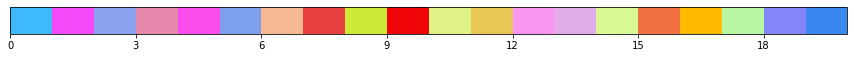

In [1]:
# Generate random colormap
def rand_cmap(nlabels, type='bright', first_color_black=True, last_color_black=False, verbose=True):
    """
    Creates a random colormap to be used together with matplotlib. Useful for segmentation tasks
    :param nlabels: Number of labels (size of colormap)
    :param type: 'bright' for strong colors, 'soft' for pastel colors
    :param first_color_black: Option to use first color as black, True or False
    :param last_color_black: Option to use last color as black, True or False
    :param verbose: Prints the number of labels and shows the colormap. True or False
    :return: colormap for matplotlib
    """
    from matplotlib.colors import LinearSegmentedColormap
    import colorsys
    import numpy as np
    
    if type not in ('bright', 'soft'):
        print ('Please choose "bright" or "soft" for type')
        return

    if verbose:
        print('Number of labels: ' + str(nlabels))

    # Generate color map for bright colors, based on hsv
    if type == 'bright':
        randHSVcolors = [(np.random.uniform(low=0.0, high=1),
                          np.random.uniform(low=0.2, high=1),
                          np.random.uniform(low=0.9, high=1)) for i in range(nlabels)]

        # Convert HSV list to RGB
        randRGBcolors = []
        for HSVcolor in randHSVcolors:
            randRGBcolors.append(colorsys.hsv_to_rgb(HSVcolor[0], HSVcolor[1], HSVcolor[2]))

        if first_color_black:
            randRGBcolors[0] = [0, 0, 0]

        if last_color_black:
            randRGBcolors[-1] = [0, 0, 0]

        random_colormap = LinearSegmentedColormap.from_list('new_map', randRGBcolors, N=nlabels)

    # Generate soft pastel colors, by limiting the RGB spectrum
    if type == 'soft':
        low = 0.6
        high = 0.95
        randRGBcolors = [(np.random.uniform(low=low, high=high),
                          np.random.uniform(low=low, high=high),
                          np.random.uniform(low=low, high=high)) for i in range(nlabels)]

        if first_color_black:
            randRGBcolors[0] = [0, 0, 0]

        if last_color_black:
            randRGBcolors[-1] = [0, 0, 0]
        random_colormap = LinearSegmentedColormap.from_list('new_map', randRGBcolors, N=nlabels)

    # Display colorbar
    if verbose:
        from matplotlib import colors, colorbar
        from matplotlib import pyplot as plt
        fig, ax = plt.subplots(1, 1, figsize=(15, 0.5))

        bounds = np.linspace(0, nlabels, nlabels + 1)
        norm = colors.BoundaryNorm(bounds, nlabels)

        cb = colorbar.ColorbarBase(ax, cmap=random_colormap, norm=norm, spacing='proportional', ticks=None,
                                   boundaries=bounds, format='%1i', orientation=u'horizontal')

    return random_colormap,randRGBcolors


new_cmap,_ = rand_cmap(20, type='bright', first_color_black=False, last_color_black=False, verbose=True)

# Seaborn

In [ ]:
import seaborn as sns

#boxplots by manual binning first
AgeNN_binned = np.round(better_clusters.AgeNN.values/0.25,0)*0.25
sns.boxplot(AgeNN_binned,better_clusters.Rnorm_BSS_mean,ax=ax[0][0],width=0.6)

sns.pairplot(subsample,vars=['log_N_BSS','log_N_TO','AgeNN','log_N_relax','log_mass','log_density','log_fraction'], corner=True,kind="hist")


# Astropy

In [ ]:
from astroquery.gaia import Gaia

adql_job =  "select top 1999 "+\
            "ra, dec "+\
            "FROM gaiadr2.gaia_source WHERE "+\
            "parallax is not null and "+\
            "ABS(parallax-"+str(parallax_limit)+")>parallax_error and "+\
            "contains(point('icrs',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec), "+\
            "circle('icrs',"+str(ra)+","+str(dec)+","+str(radius)+"))=1"

adql_job_averaged = "select top 1999 "+\
                "AVG(pmra) AS field_pmra, AVG(pmdec) AS field_pmdec, STDDEV(pmra) AS field_pmra_std, STDDEV(pmdec) AS field_pmdec_std "+\
                "FROM gaiadr2.gaia_source WHERE "+\
                "pmra < 200 and pmra > -50 and pmdec < 50 and pmdec > -100 and "+\
                "parallax is not null and "+\
                "ABS(parallax-"+str(parallax_limit)+")>parallax_error and "+\
                "contains(point('icrs',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec), "+\
                "circle('icrs',"+str(ra)+","+str(dec)+","+str(radius)+"))=1"
try:
    job = Gaia.launch_job(adql_job)
    r = job.get_results()
    # print(r)
    return r
except:
    print ('No field star found near %s' %cl_name)
    return [[0.,0.,0.,0.]]




# Scipy

In [ ]:
from scipy.signal import find_peaks



# miscellaneous

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# printing
print("slope:     {} +/- {}".format(p[0], np.sqrt(V[0][0])))
print('Clusters with $N_{BSS}\geq10$\n$N_{BSS} \propto M^{%.2f}$' %(m))


def print_progress(current_iteration, total_iterations=100, step=50, message='Progress'): 
    if (current_iteration%step==0):
        print ('\r %s:  %d/%d  (%d%%)' %(message, current_iteration+1, total_iterations, 100*(current_iteration+1)/total_iterations), end='')
